# Women's E-Commerce Clothing Reviews

---
Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [205]:
import pandas as pd
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

## Data Understanding

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 11)

In [206]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   unnamed:_0               23486 non-null  int64 
 1   clothing_id              23486 non-null  int64 
 2   age                      23486 non-null  int64 
 3   title                    19676 non-null  object
 4   review_text              22641 non-null  object
 5   rating                   23486 non-null  int64 
 6   recommended_ind          23486 non-null  int64 
 7   positive_feedback_count  23486 non-null  int64 
 8   division_name            23472 non-null  object
 9   department_name          23472 non-null  object
 10  class_name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
null_data = df.isnull().sum()
null_data.sort_values(ascending=False)

title                      3810
review_text                 845
class_name                   14
department_name              14
division_name                14
positive_feedback_count       0
recommended_ind               0
rating                        0
age                           0
clothing_id                   0
unnamed:_0                    0
dtype: int64

Rata-rata rating semua produk 4.196031678446734


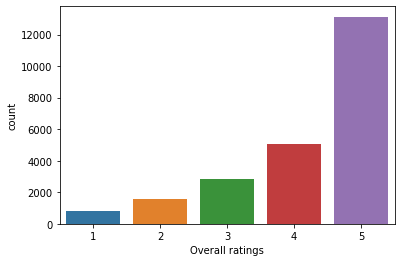

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df.rating)
plt.xlabel('Overall ratings')

rate_mean = df['rating'].mean()
print("Rata-rata rating semua produk", rate_mean)

Rata-rata umur pembeli :  43.198543813335604
Median umur pembeli :  41.0


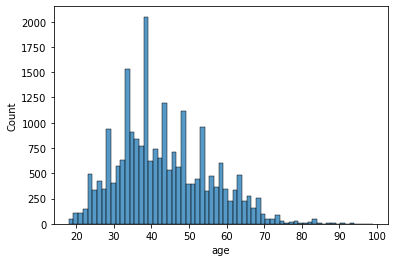

In [ ]:
sns.histplot(x=df.age)
age_mean = df['age'].mean()
age_med = df['age'].median()
print("Rata-rata umur pembeli : ", age_mean)
print("Median umur pembeli : ", age_med)

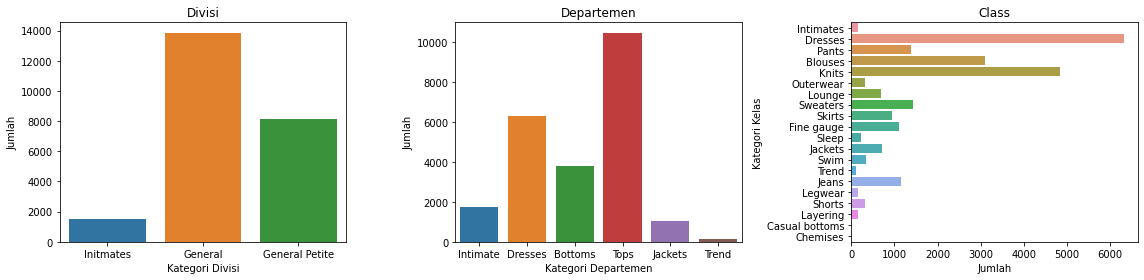

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(16,4), sharey=False)
sns.countplot(x=df.division_name, ax=ax[0])
ax[0].set_title("Divisi")
ax[0].set_xlabel("Kategori Divisi")
ax[0].set_ylabel("Jumlah")
sns.countplot(x=df.department_name, ax=ax[1])
ax[1].set_title("Departemen")
ax[1].set_xlabel("Kategori Departemen")
ax[1].set_ylabel("Jumlah")
sns.countplot(y=df.class_name, ax=ax[2])
ax[2].set_title("Class")
ax[2].set_xlabel("Jumlah")
ax[2].set_ylabel("Kategori Kelas")
plt.tight_layout()
plt.show()

## Data Preprocessing


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings category')

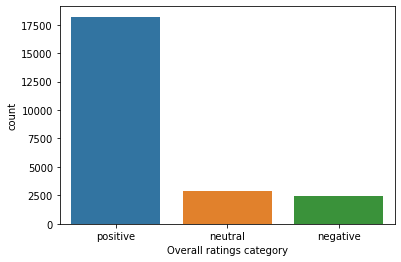

In [208]:
df['ratings_category'] = df.rating.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})
sns.countplot(df.ratings_category)
plt.xlabel('Overall ratings category')

In [209]:
df = df[['review_text', 'ratings_category']]
df

,review_text,ratings_category
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
...,...,...
23481,I was very happy to snag this dress at such a ...,positive
23482,"It reminds me of maternity clothes. soft, stre...",neutral
23483,"This fit well, but the top was very see throug...",neutral
23484,I bought this dress for a wedding i have this ...,neutral


In [210]:
df.isnull().sum()

review_text         845
ratings_category      0
dtype: int64

In [211]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

review_text         0
ratings_category    0
dtype: int64

In [212]:
df.shape

(22641, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


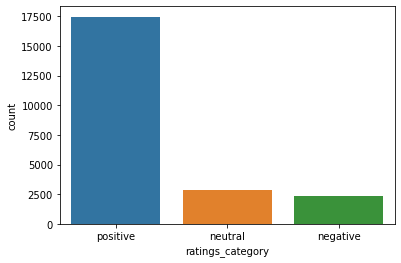

In [213]:
sns.countplot(df.ratings_category)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


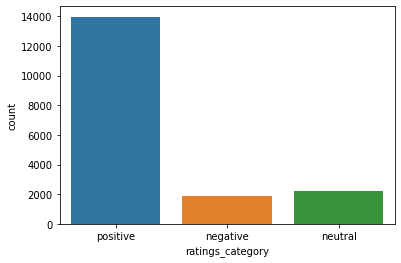

In [ ]:
sns.countplot(train.ratings_category)

In [ ]:
df_positive = train[(train['ratings_category'] == 'positive')]
df_positive.shape

(13964, 2)

In [ ]:
df_neutral = train[(train['ratings_category'] == 'neutral')]
df_neutral.shape

(2235, 2)

In [ ]:
df_negative = train[(train['ratings_category'] == 'negative')]
df_negative.shape

(1913, 2)

In [ ]:
train_data = df_positive.append(df_neutral, ignore_index=True)
train_data = train_data.append(df_negative, ignore_index=True)
train_data

,review_text,ratings_category
0,This top looks better on than on the hanger. i...,positive
1,There wasn't much question as to whether or no...,positive
2,These leggings are so warm and comfortable. th...,positive
3,This arrived in white at my store and it was s...,positive
4,"I have to admit, seeing these tops online, i w...",positive
...,...,...
18107,It is a shame when a product such as this is l...,negative
18108,But it runs super small. i wear a medium for e...,negative
18109,The fabric and colors of this dress are beauti...,negative
18110,This one didn't work for me. ordered this and ...,negative


In [ ]:
for i in range(0, 5):
    train_data = train_data.append(df_neutral, ignore_index=True)
    
for i in range(0, 6):
    train_data = train_data.append(df_negative, ignore_index=True)

train_data

,review_text,ratings_category
0,This top looks better on than on the hanger. i...,positive
1,There wasn't much question as to whether or no...,positive
2,These leggings are so warm and comfortable. th...,positive
3,This arrived in white at my store and it was s...,positive
4,"I have to admit, seeing these tops online, i w...",positive
...,...,...
40760,It is a shame when a product such as this is l...,negative
40761,But it runs super small. i wear a medium for e...,negative
40762,The fabric and colors of this dress are beauti...,negative
40763,This one didn't work for me. ordered this and ...,negative


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


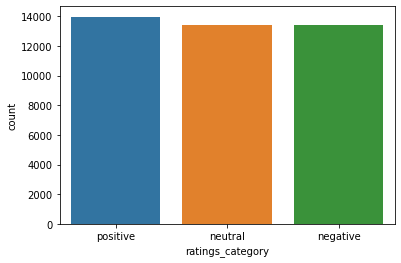

In [ ]:
sns.countplot(train_data.ratings_category)

In [ ]:
category = pd.get_dummies(train_data['ratings_category'])
train_data = pd.concat([train_data, category], axis = 1)
train_data = train_data.drop(['ratings_category'],  axis = 1)
train_data

,review_text,negative,neutral,positive
0,This top looks better on than on the hanger. i...,0,0,1
1,There wasn't much question as to whether or no...,0,0,1
2,These leggings are so warm and comfortable. th...,0,0,1
3,This arrived in white at my store and it was s...,0,0,1
4,"I have to admit, seeing these tops online, i w...",0,0,1
...,...,...,...,...
40760,It is a shame when a product such as this is l...,1,0,0
40761,But it runs super small. i wear a medium for e...,1,0,0
40762,The fabric and colors of this dress are beauti...,1,0,0
40763,This one didn't work for me. ordered this and ...,1,0,0


In [ ]:
category = pd.get_dummies(test['ratings_category'])
test = pd.concat([test, category], axis = 1)
test = test.drop(['ratings_category'],  axis = 1)
test

,review_text,negative,neutral,positive
13365,This sweater is so beautiful on. it is thick m...,0,0,1
19834,This piece is almost what i want... i tried on...,0,0,1
18722,Really like this blouse but am returning for a...,0,0,1
10635,These are the perfect light weight relaxing su...,0,0,1
7348,These look nothing like the picture! they are ...,1,0,0
...,...,...,...,...
1092,Great that it's hand washable because i hate t...,0,0,1
8448,I am usually a regular xs with retailer tops. ...,0,0,1
5875,"Boxy, short & wide! luv this brand but super d...",1,0,0
23285,This top is very gorgeous and chic. it is very...,0,0,1


In [ ]:
x_train = train_data['review_text'].values.astype(str)
y_train = train_data[['negative', 'neutral', 'positive']].values

x_test = test['review_text'].values.astype(str)
y_test = test[['negative', 'neutral', 'positive']].values

## Rock n Roll

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 10000, oov_token = 'x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 10000, output_dim = 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)               

In [ ]:
num_epochs = 10
history = model.fit(
    padded_train,
    y_train,
    epochs = num_epochs,
    validation_data = (padded_test, y_test),
    verbose= 2
)

Epoch 1/10
1344/1344 - 41s - loss: 1.0973 - accuracy: 0.3621 - val_loss: 1.0933 - val_accuracy: 0.2250
Epoch 2/10
1344/1344 - 38s - loss: 0.9973 - accuracy: 0.4750 - val_loss: 0.7912 - val_accuracy: 0.5964
Epoch 3/10
1344/1344 - 38s - loss: 0.8379 - accuracy: 0.5592 - val_loss: 0.9531 - val_accuracy: 0.6337
Epoch 4/10
1344/1344 - 39s - loss: 0.7667 - accuracy: 0.5833 - val_loss: 1.5600 - val_accuracy: 0.7141
Epoch 5/10
1344/1344 - 39s - loss: 0.6891 - accuracy: 0.6326 - val_loss: 2.4462 - val_accuracy: 0.7331
Epoch 6/10
1344/1344 - 39s - loss: 0.6265 - accuracy: 0.7013 - val_loss: 5.2019 - val_accuracy: 0.7461
Epoch 7/10
1344/1344 - 39s - loss: 0.5551 - accuracy: 0.7552 - val_loss: 7.7262 - val_accuracy: 0.7430
Epoch 8/10
1344/1344 - 39s - loss: 0.5687 - accuracy: 0.7567 - val_loss: 17.2060 - val_accuracy: 0.7766
Epoch 9/10
1344/1344 - 39s - loss: 0.4785 - accuracy: 0.8096 - val_loss: 23.4832 - val_accuracy: 0.7810
Epoch 10/10
1344/1344 - 38s - loss: 0.4833 - accuracy: 0.8092 - val_los

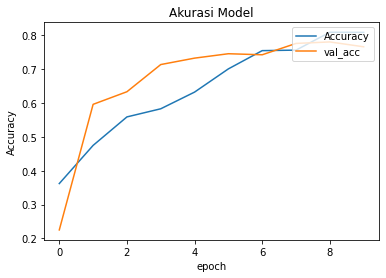

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'val_acc'], loc = 'upper right')
plt.show()

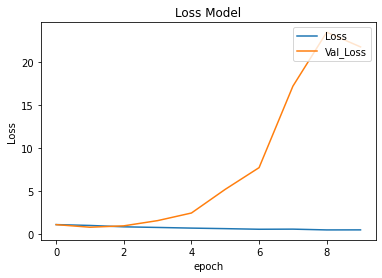

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val_Loss'], loc = 'upper right')
plt.show()